# PROBLEMA: sensação térmica

O problema consiste em determinar quais meses do ano de 2024 foram ruins
em questão de sensação térmica em Brasília de acordo com o heat index Norte americano que determina a relação humidade e temperatura na sensação térmica e equilíbrio térmico do corpo humano.

[Indicie de temperatura](https://www.weather.gov/ama/heatindex)

Conjunto de dados de 1/1/2024 até 1/1/2025

# DEFINIÇÃO MATEMÁTICA DA EQUAÇÃO DO INDEX DE TEMPERATURA

A computação do índicie de temperatura trata-se de um refinamento do resultado obtido pela análise de regressão multipla desenvolvido por Lans P. Rothfusz e descrito em 1990 pelo serviço nacional do tempo (_National Weather Service_). A equação de regressão é a seguinte:

HI = -42.379 + 2.04901523\*T + 10.14333127\*RH - 0.22475541\*T\*RH - 0.00683783\*T\*T - 0.05481717\*RH\*RH + 0.00122874\*T\*T\*RH + 0.00085282\*T\*RH\*RH - 0.00000199\*T\*T\*RH\*RH

Onde T é a temperatura e RH a humidade relativa.
O resultado HI trata-se da temperatura aparente aproximadada em graus Fahrenheit sentida pela população.

Se a humidade relativa for menor que 13% e a temperatura estiver de 80 até 112 graus F então a seguinte correção deve ser subtraido ao resultado da equação principal acima exposta:

AJUSTE = ((13-RH)/4)\*SQRT((17-ABS(T-95.))/17)

Inversamente, se a humidade relativa for maior que 85% e a temperatura estiver entre 80 e 87°F, então o seguinte ajuste será somado ao resultado da equação principal:

AJUSTE =  ((RH-85)/10) \* ((87-T)/5)

A regressão Rothfusz não é adequada para condições onde a temperatura e humidade conferem um valor de HI menor que ou igual a 80°F. Nestes casos a equação é substituida por esta fórmula mais simples que calculam valores consistentes com os resultados de Steadman:

HI = 0.5 \* (T + 61.0 + ((T-68.0)\*1.2) + (RH\*0.094))

Na prática a fórmula acima é computada primeiro, logo em seguida faz-se média do resultado com temperatura, por fim, se o resultado é igual ou maior que 80°F então a regressão completa é aplicada com os respectivos ajustes se necessário for.

A regressão Rothfusz não é válida para temperaturas e humidades relativas extremas além do limite de dados considerados por Steadman.


[Heat index equation definition](https://www.wpc.ncep.noaa.gov/html/heatindex_equation.shtml)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

arquivo = open('BRASILIA_A001_US_FORMAT.csv','r')
df = pd.read_csv(arquivo, sep=";")
df.describe()

,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
count,8808.000000,8782.000000,8782.000000,8782.000000,8782.000000,8782.000000,8781.000000,8782.000000,8782.000000,8782.000000,8784.000000,8784.000000,8784.000000,8783.000000,8782.000000,8784.000000,4713.000000,8784.000000
mean,1150.000000,21.976270,22.720098,21.271703,67.322022,70.449670,64.124018,14.479538,15.029242,13.952881,887.875786,888.122393,887.629144,2.085643,147.351401,4.905225,1443.456440,0.159221
std,692.257953,3.929411,4.017217,3.825458,22.964869,22.621843,23.129604,5.132630,5.085803,5.199397,2.405999,2.381219,2.416138,0.986935,101.492217,2.076336,1077.247894,1.262193
min,0.000000,9.500000,10.400000,9.500000,11.000000,12.000000,10.000000,-4.200000,-3.200000,-5.000000,880.600000,880.700000,880.500000,0.100000,1.000000,0.700000,0.100000,0.000000
25%,575.000000,19.400000,19.800000,19.000000,50.000000,55.000000,46.000000,10.400000,11.000000,10.000000,886.200000,886.500000,886.000000,1.300000,79.000000,3.300000,392.100000,0.000000
50%,1150.000000,21.500000,22.200000,20.800000,70.000000,75.000000,66.000000,16.800000,17.400000,16.200000,887.800000,888.000000,887.500000,2.000000,108.000000,4.800000,1367.800000,0.000000
75%,1725.000000,24.800000,25.700000,23.900000,88.000000,91.000000,85.000000,18.600000,19.100000,18.200000,889.500000,889.700000,889.300000,2.800000,211.750000,6.300000,2390.800000,0.000000
max,2300.000000,35.400000,36.100000,34.200000,98.000000,99.000000,98.000000,21.800000,22.600000,21.300000,895.200000,895.200000,895.100000,7.500000,360.000000,18.900000,4080.400000,35.200000


In [ ]:
df.head(25)

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,01/01/2024,0,22.0,22.6,21.8,79.0,81.0,77.0,18.2,18.6,18.2,885.7,885.7,885.3,1.5,311.0,2.8,NaN,0.0
1,01/01/2024,100,21.2,22.0,21.1,85.0,85.0,79.0,18.6,18.7,18.1,886.7,886.7,885.7,1.5,315.0,2.9,NaN,0.0
2,01/01/2024,200,20.9,21.5,20.9,88.0,88.0,85.0,18.8,18.9,18.7,887.1,887.2,886.7,1.1,305.0,3.3,NaN,0.0
3,01/01/2024,300,20.9,21.1,20.8,85.0,88.0,85.0,18.3,18.9,18.3,887.1,887.4,887.1,1.5,304.0,3.3,NaN,0.0
4,01/01/2024,400,20.5,21.0,20.5,89.0,89.0,85.0,18.6,18.6,18.3,886.4,887.1,886.4,2.0,315.0,4.0,NaN,0.0
5,01/01/2024,500,20.4,20.5,20.3,91.0,91.0,89.0,18.9,18.9,18.6,886.1,886.4,886.1,1.5,310.0,4.0,NaN,0.0
6,01/01/2024,600,19.6,20.4,19.6,94.0,94.0,91.0,18.7,18.9,18.6,885.5,886.1,885.4,1.1,309.0,3.0,NaN,0.0
7,01/01/2024,700,20.0,20.1,19.4,94.0,95.0,94.0,19.0,19.2,18.5,885.2,885.5,885.2,1.4,333.0,2.6,NaN,0.0
8,01/01/2024,800,20.1,20.1,19.7,94.0,95.0,94.0,19.1,19.2,18.8,885.5,885.5,885.1,1.2,308.0,2.6,NaN,0.0
9,01/01/2024,900,19.6,20.1,19.6,95.0,96.0,94.0,18.8,19.1,18.8,885.7,885.8,885.5,1.1,312.0,2.4,4.3,0.0


In [ ]:
# NORMALIZAÇÃO
print( df.isnull().sum(),"\n\n\n", df.duplicated().sum())

Data                       0
Hora (UTC)                 0
Temp. Ins. (C)            26
Temp. Max. (C)            26
Temp. Min. (C)            26
Umi. Ins. (%)             26
Umi. Max. (%)             26
Umi. Min. (%)             27
Pto Orvalho Ins. (C)      26
Pto Orvalho Max. (C)      26
Pto Orvalho Min. (C)      26
Pressao Ins. (hPa)        24
Pressao Max. (hPa)        24
Pressao Min. (hPa)        24
Vel. Vento (m/s)          25
Dir. Vento (m/s)          26
Raj. Vento (m/s)          24
Radiacao (KJ/m²)        4095
Chuva (mm)                24
dtype: int64 


 0


In [ ]:
# TRATANDO VALORES NULOS NOS CAMPOS DE INTERESSE
df["Temp. Max. (C)"] = df["Temp. Max. (C)"].fillna( df["Temp. Max. (C)"].mean() )
df["Umi. Max. (%)"]  = df["Umi. Max. (%)"].fillna( df["Umi. Max. (%)"].mean() )

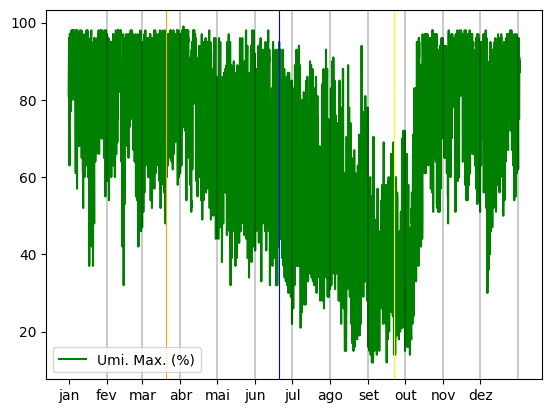

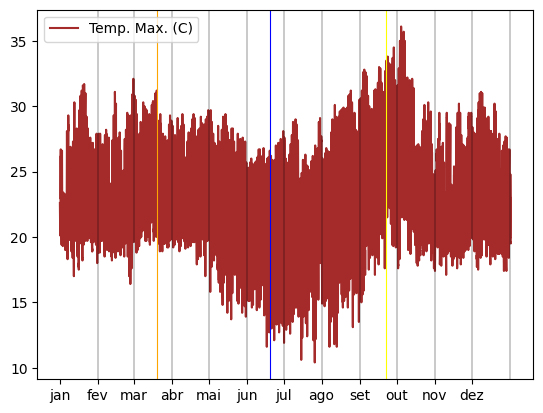

In [ ]:
# barras correspondentes aos inícios de estações do ano de 2024
OUT_INV_VER = ['20/03/2024','20/06/2024','22/09/2024']
COLOR = ["orange","blue","yellow"]
MESES = (31,29,31,30,31,30,31,31,30,31,30,31)
MESES_NOMES=('jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez')
DIA=24

import matplotlib.pyplot as plt

def delimitarMeses( dataframe, nomeColunaHoras="Hora (UTC)" ):
  dias = 0
  mes = 0
  diasDosRegistrosFinais = [0]

  for i in range(1,len(dataframe)):
    if dataframe[nomeColunaHoras][i] == 0:
      dias += 1
      if dias == MESES[mes] and mes <= len(MESES):
        plt.axvline(x=i, color="black", linestyle='-', linewidth=0.3)
        if len(diasDosRegistrosFinais) < 12:
          diasDosRegistrosFinais.append(i)
        mes += 1
        dias = 0
  plt.xticks(ticks=diasDosRegistrosFinais, labels=MESES_NOMES)
  return diasDosRegistrosFinais

def plotagemPersonalizada( dataframe, colunaAlvo="", cor="red", delimitadorMeses=0, nomeColunaHoras="", nomeColunaDatetime=""):
    ax = dataframe.plot(y=[colunaAlvo], kind='line',color=cor)
    estacao = 0
    for i in range(0, len(dataframe)):
        if estacao == 3:
            break
        if dataframe[nomeColunaDatetime][i] == OUT_INV_VER[estacao]:
            plt.axvline(x=i, color=COLOR[estacao], linestyle='-', linewidth=0.8)
            estacao += 1
    if delimitarMeses != 0:
      delimitadorMeses(dataframe, nomeColunaHoras)
    plt.show()

plotagemPersonalizada(df, colunaAlvo="Umi. Max. (%)", cor="green", delimitadorMeses=delimitarMeses, nomeColunaHoras="Hora (UTC)", nomeColunaDatetime="Data")
plotagemPersonalizada(df, colunaAlvo="Temp. Max. (C)", cor="brown", delimitadorMeses=delimitarMeses, nomeColunaHoras="Hora (UTC)", nomeColunaDatetime="Data")

<Axes: xlabel='Umi. Max. (%)', ylabel='Count'>

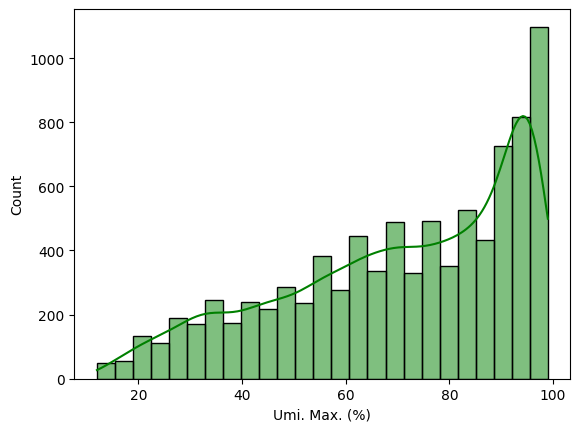

In [ ]:
sns.histplot(data=df, x="Umi. Max. (%)", color="green", kde=True)

<Axes: xlabel='Temp. Max. (C)', ylabel='Count'>

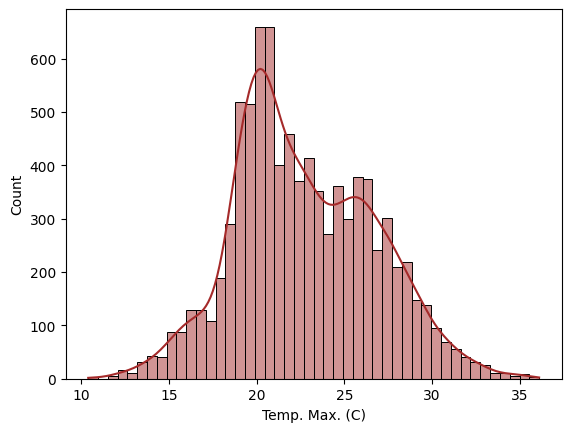

In [ ]:
sns.histplot(data=df, x="Temp. Max. (C)", color="brown", kde=True)

<Axes: xlabel='Temp. Max. (C)', ylabel='Umi. Max. (%)'>

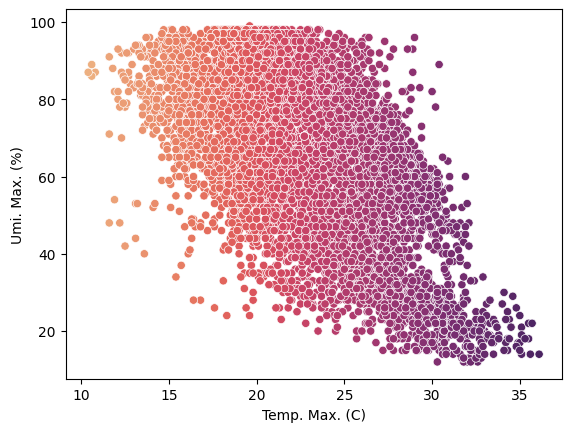

In [ ]:
# SCATERPLOT ENTRE TEMPERATURA MÁXIMA E HUMIDADE MÁXIMA
sns.scatterplot(data=df, x="Temp. Max. (C)", y="Umi. Max. (%)", legend=False, hue="Temp. Max. (C)", palette="flare" )

In [ ]:
#LP
import math

def FahrenheitToCelsius( tF=32 ):
  return (tF-32)/1.8

def CelsiusToFahrenheit( tC=0 ):
  return (tC*1.8)+32

# recebe matrizes unidimensionais de inteiros correspondentes à temperatura(°C) e humidade(%)
# retorna matriz de inteiros correspondente ao índicie de temperatura
def equacaoDeIndicieCalor( temperaturasCelsius=[], humidadesRelativas=[] ):
  temperaturasFahrenheit = []
  indicieDeCalor = []

  for tC in temperaturasCelsius:
    temperaturasFahrenheit.append( CelsiusToFahrenheit( tC ) )

  i = 0
  while i < len( temperaturasFahrenheit ):
    T = temperaturasFahrenheit[i]
    RH = humidadesRelativas[i]

    # A regressão de Rothfusz não é apropriada quando as condições de temperatura e umidade
    # justificam um valor de índice de calor abaixo de cerca de 80 graus F
    HI = 0.5 * (T + 61.0 + ((T-68.0)*1.2) + (RH*0.094))

    MEDIA = (HI+T)/2
    if MEDIA >= 80:
      #Análise de regressão múltipla Rothfusz de 80 F (26°C) até 112 F (44°C)
      HI = -42.379 + 2.04901523*T + 10.14333127*RH - .22475541*T*RH - .00683783*T*T - .05481717*RH*RH + .00122874*T*T*RH + .00085282*T*RH*RH - .00000199*T*T*RH*RH
      if RH > 13:
        indicieDeCalor.append( HI )
      elif RH <= 13:
        AJUSTE = ((13-RH)/4)*math.sqrt((17-math.fabs(T-95.))/17)
        indicieDeCalor.append( HI-AJUSTE )
      elif RH > 80:
        AJUSTE = ((RH-85)/10) * ((87-T)/5)
        indicieDeCalor.append( HI+AJUSTE )
    else:
      indicieDeCalor.append( HI )
    i += 1

    indicieDeCalorCelsius = []
    for elemento in indicieDeCalor:
      indicieDeCalorCelsius.append(FahrenheitToCelsius(elemento))

  return indicieDeCalorCelsius

In [ ]:
listaIndicieCalor = equacaoDeIndicieCalor( df['Temp. Max. (C)'].array, df['Umi. Max. (%)'].array)
print(len(listaIndicieCalor), df["Data"].size)

8808 8808


In [ ]:
# OBTENDO DATAFRAME COM TIMESTAMPS AO INVÊS DE DATETIME
import time
import datetime

def converterDatetimeParaUnixTimestamp( datetimeStr ):
  return time.mktime(datetime.datetime.strptime(datetimeStr, "%d/%m/%Y").timetuple())

serieHI = pd.Series(data=listaIndicieCalor)
datasTempo = pd.Series(data=df["Data"].array).apply( converterDatetimeParaUnixTimestamp )
horas = df["Hora (UTC)"]
dados = pd.DataFrame( data={"Data":datasTempo, "HoraUTC": horas, "Heat Index":serieHI} )
dados.head(1)

,Data,HoraUTC,Heat Index
0,1.704067e+09,0,23.030556


#As seguintes classificações determinam o quão arriscado pode ser trabalhar sobre certas condições de índicie de temperatura:

## Atenção (AMARELO)

80°F - 90°F (26,7°C - 32,2°C): Fadiga possível com exposição prolongada e/ou atividade física.

## Atenção Extrema (VERMELHO)

90°F - 103°F (32,2°C - 39,4°C): Insolação, cãibras por calor ou exaustão pelo calor possíveis com exposição prolongada e/ou atividade física.

## Perigo

103°F - 124°F (39,4°C - 51,1°C): Cãibras por calor ou exaustão pelo calor prováveis, e insolação possível com exposição prolongada e/ou atividade física.

## Perigo Extremo

125°F ou mais (≥51,7°C): Insolação altamente provável.

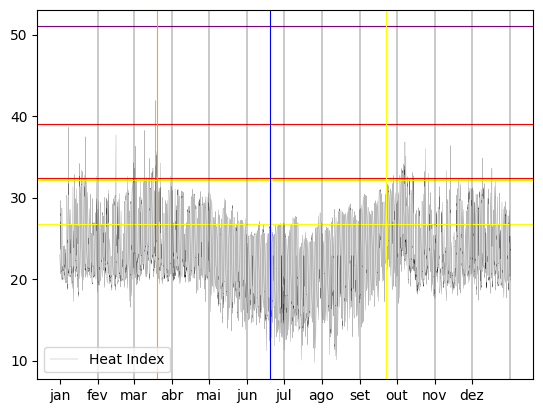

In [ ]:
# PLOTANDO DADOS POR HORA DE CADA DIA DO ANO. PRIMEIRAS CONCLUSÕES
ax = dados.plot(y=["Heat Index"], kind='line',color="black", linewidth=0.1)
plt.axhline(y=26.7, color="yellow", linestyle='-', linewidth=0.8)
plt.axhline(y=32.2, color="yellow", linestyle='-', linewidth=0.8)
plt.axhline(y=32.4, color="red", linestyle='-', linewidth=0.8)
plt.axhline(y=39, color="red", linestyle='-', linewidth=0.8)
plt.axhline(y=51, color="purple", linestyle='-', linewidth=0.8)

def plotagemEstacoes( dataframe, nomeColunaDatetime="Data", cores=["red"], datasInicioEstacoes=["13/02/2024"] ):
  estacao = 0
  for i in range(0, len(dataframe)):
    if estacao == 3:
      break
    if dataframe[nomeColunaDatetime][i] == datasInicioEstacoes[estacao]:
      plt.axvline(x=i, color=cores[estacao], linestyle='-', linewidth=0.8)
      estacao += 1

# df.count() == dados.count()
plotagemEstacoes( df, nomeColunaDatetime="Data", cores=COLOR, datasInicioEstacoes=OUT_INV_VER )
DELIMITACOES = delimitarMeses( df, nomeColunaHoras="Hora (UTC)" )

Text(0, 0.5, 'Heat Index')

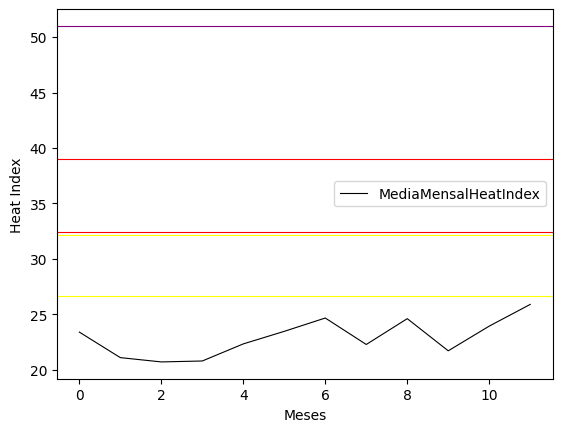

In [ ]:
# OBTENDO MÉDIAS DE CADA MÊS MEIO DIA
AMARELO = 26.7
VERMELHO = 32.2

def mediasDeSubPartes( dataframe=0, coluna="", delimitacoes=[] ):
  apenasMeioDia = dataframe.loc[0:len(dataframe)].query("HoraUTC == 1200")
  mediasPorMes = []
  leitor = 1

  if delimitacoes[ len(delimitacoes)-1 ] != len(dataframe):
    delimitacoes.append(len(dataframe))

  while leitor < (len(delimitacoes)):
    mediasPorMes.append( apenasMeioDia[coluna][leitor-1:leitor].mean() )
    leitor += 1
  return mediasPorMes

meses=list(MESES)
dfMediasMensais = pd.DataFrame( data={ "MediaMensalHeatIndex": mediasDeSubPartes(dataframe=dados, coluna="Heat Index", delimitacoes=meses) } )
ax = dfMediasMensais.plot(y=["MediaMensalHeatIndex"], kind='line',color="black", linewidth=0.8)
plt.axhline(y=26.7, color="yellow", linestyle='-', linewidth=0.8)
plt.axhline(y=32.2, color="yellow", linestyle='-', linewidth=0.8)
plt.axhline(y=32.4, color="red", linestyle='-', linewidth=0.8)
plt.axhline(y=39, color="red", linestyle='-', linewidth=0.8)
plt.axhline(y=51, color="purple", linestyle='-', linewidth=0.8)
plt.xlabel("Meses")
plt.ylabel("Heat Index")

In [ ]:
# AGREGANDO DADOS POR MÉDIA POR DIA (UNIX TIMESTAMP CRESCENTE)
dadosDerivados = dados.groupby('Data').agg({'Heat Index':'mean'})
dadosDerivados2 = pd.DataFrame( data=dadosDerivados["Heat Index"].array, columns=["Heat Index"] ) # DADOS ÚTEIS À ANÁLISE FINAL

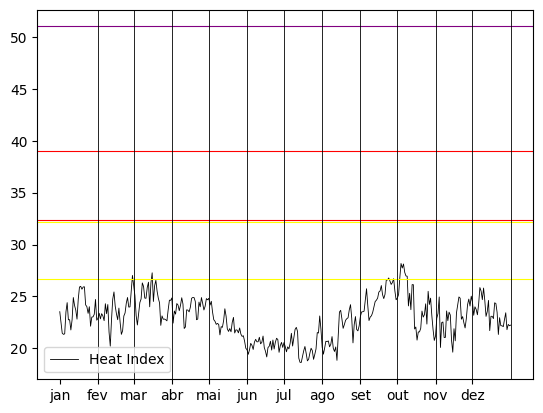

In [ ]:
# PLOTANDO MÉDIA DE HEAT INDEX POR CADA DIA DE 2024.
ax = dadosDerivados2.plot(y=["Heat Index"], kind='line',color="black", linewidth=0.6)
plt.axhline(y=26.7, color="yellow", linestyle='-', linewidth=0.8)
plt.axhline(y=32.2, color="yellow", linestyle='-', linewidth=0.8)
plt.axhline(y=32.4, color="red", linestyle='-', linewidth=0.8)
plt.axhline(y=39, color="red", linestyle='-', linewidth=0.8)
plt.axhline(y=51, color="purple", linestyle='-', linewidth=0.8)

def delimitarMesesV2(df=0):
  dias = 0
  mes = 0
  diasDosRegistrosFinais = [0]

  for i in range(1,len(df)):
      dias += 1
      if dias == MESES[mes] and mes <= len(MESES):
        plt.axvline(x=i, color="black", linestyle='-', linewidth=0.6)
        diasDosRegistrosFinais.append(i)
        dias = 0
        mes += 1
  diasDosRegistrosFinais.pop(len(diasDosRegistrosFinais)-1)
  plt.xticks(ticks=diasDosRegistrosFinais, labels=MESES_NOMES)
delimitarMesesV2(dadosDerivados2)

# FIM